<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/eichler/Zadanie_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('/content/train.csv', sep=',')

df.head()

<ipython-input-39-5cfd4bcf7160>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/train.csv', sep=',')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [40]:
df.shape

(100000, 28)

In [41]:
df.drop_duplicates()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [42]:
df.shape

(100000, 28)

In [43]:
df = df.drop(["ID", "Customer_ID", "Name", "SSN"], axis=1)

In [44]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
df['Month'] = df['Month'].astype('string')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce').astype('float64')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype('Int64')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').astype('Int64')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').astype('float64')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce').astype('float64')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype('float64')
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce').astype('float64')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype('float64')


print(df.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [45]:
df.dtypes

Month                        string
Age                           Int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   Int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        Int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [46]:
czy_puste_wartosci_w_kolumnach = df.isnull().any()
print(czy_puste_wartosci_w_kolumnach)
df.dtypes



Month                       False
Age                          True
Occupation                  False
Annual_Income                True
Monthly_Inhand_Salary        True
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                  True
Type_of_Loan                 True
Delay_from_due_date         False
Num_of_Delayed_Payment       True
Changed_Credit_Limit         True
Num_Credit_Inquiries         True
Credit_Mix                  False
Outstanding_Debt             True
Credit_Utilization_Ratio    False
Credit_History_Age           True
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly      True
Payment_Behaviour           False
Monthly_Balance              True
Credit_Score                False
dtype: bool


Month                        string
Age                           Int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   Int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        Int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [47]:
df['Age'] = df['Age'].fillna(df['Age'].mean().round())
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean().round())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean().round())
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].mean().round())
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean().round())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean().round())
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].mean().round())
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean().round())
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean().round())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean().round())


In [48]:
df = df.drop(["Type_of_Loan", "Credit_History_Age"], axis=1)

In [49]:
df.head(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,4194.000000,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,4194.000000,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,4194.000000,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,Scientist,19114.12,4194.000000,3,4,3,4,8,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,January,111,_______,34847.84,3037.986667,2,4,6,1,3,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,7,...,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [50]:
mean_age = df[df['Age'] >= 0]['Age'].mean()
df.loc[df['Age'] < 0, 'Age'] = mean_age.round()
df.loc[df['Age'] > 130, 'Age'] = mean_age.round()


df['Month'] = df['Month'].fillna("January")

In [51]:
num_null_values_all_columns = df.isna().sum()

print("Number of NaN or null values in each column:")
print(num_null_values_all_columns)

Number of NaN or null values in each column:
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [52]:
#Labele

#Enkoder

le = LabelEncoder()
df.Occupation = le.fit_transform(df.Occupation)
#Weryfikacja
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,12,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,12,19114.12,4194.000000,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,116,12,19114.12,4194.000000,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,12,19114.12,4194.000000,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,12,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [53]:
df.head(20)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,12,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,12,19114.12,4194.000000,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,116,12,19114.12,4194.000000,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,12,19114.12,4194.000000,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,12,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,12,19114.12,4194.000000,3,4,3,4,8,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,July,23,12,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,August,23,12,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,January,111,15,34847.84,3037.986667,2,4,6,1,3,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,February,28,13,34847.84,3037.986667,2,4,6,1,7,...,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


<ipython-input-55-c2164aaa106b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


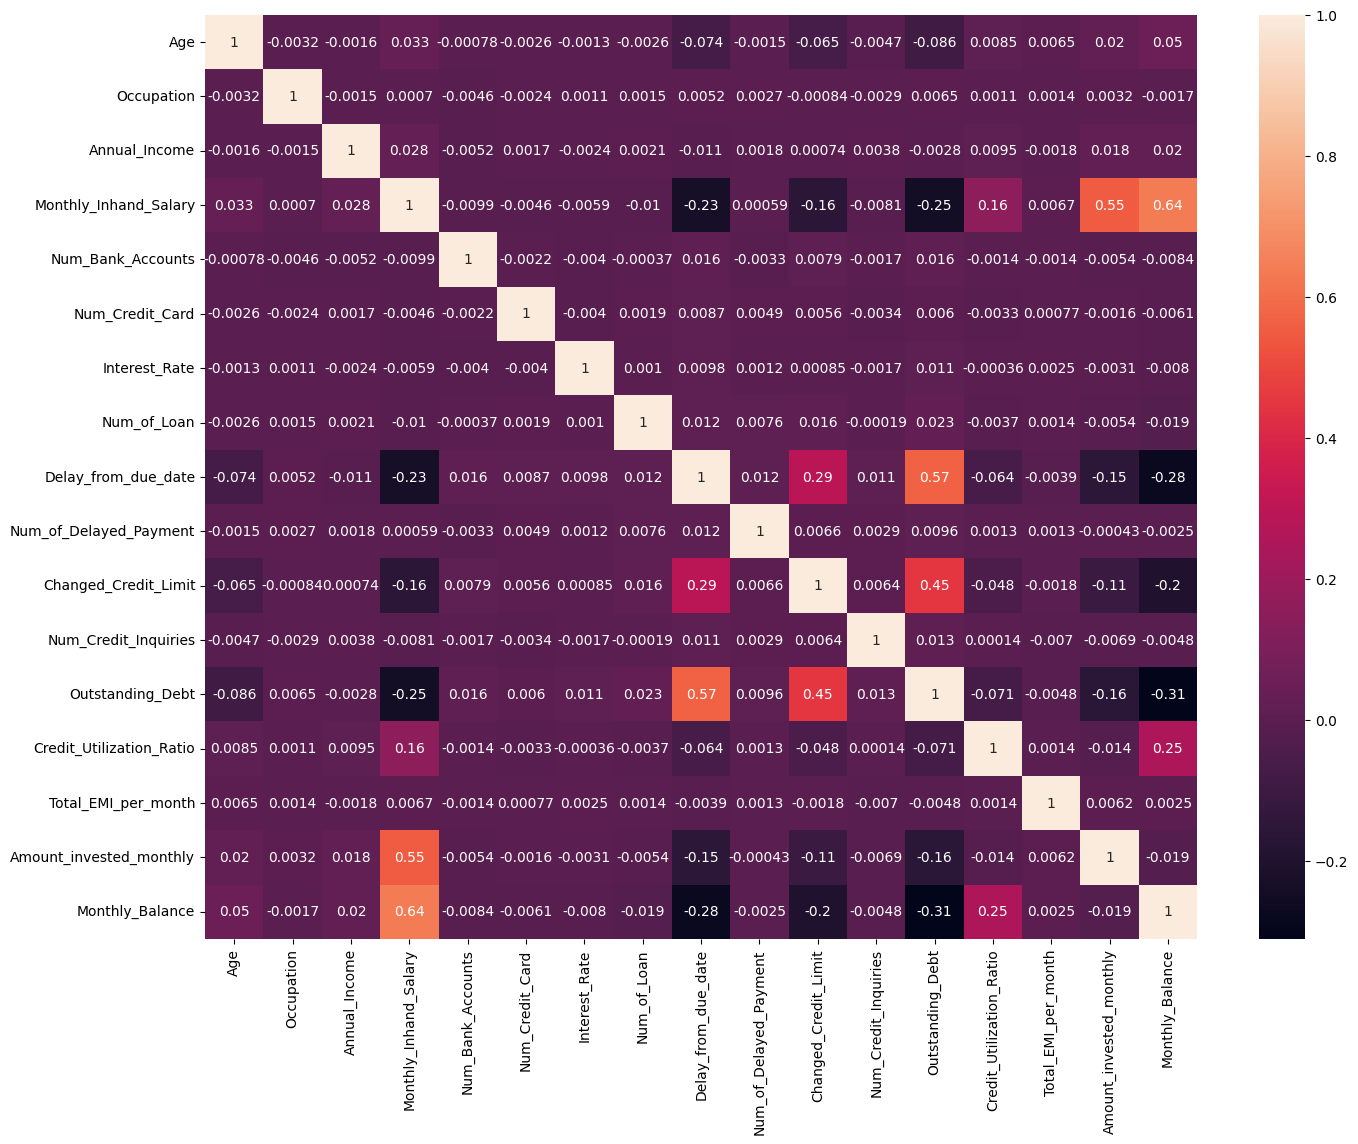

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#cor_target = abs(corr_matrix["Credit_score"])
#relevant_features = cor_target[cor_target>0.1]
#relevant_features